<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

Build Credit Card Fraud Detection model on dataset 


In [0]:
#Import neccesary libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Access the creditcard dataset

In [0]:
#Data access - Reading from a file
df = pd.read_csv("creditcard.csv")

# Explore the Data

In [7]:
df.head()
df.info()
df.shape
df.columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

(284807, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The datasets contains transactions made by credit cards where we have 492 frauds out of 284,807 transactions.It contains only numerical input variables.Features V1, V2, ... V28 are the principal components obtained with PCA.The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [8]:
#check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### There is no missing value in this dataset.

# understand the data distribution

0    284315
1       492
Name: Class, dtype: int64


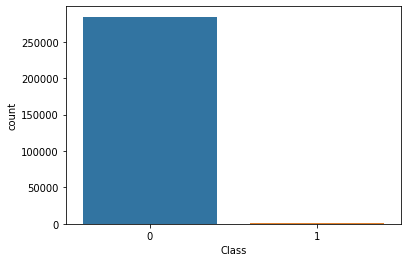

In [9]:
#understand the class distribution
print(df['Class'].value_counts())
sns.countplot(x="Class", data=df) 

###from above plot we can see its highly imbalance data only 492 cases of default while 284315 are non-deault cases.But let's try simple random sample technique  fisrt to check the precision & recall.if it'll not give good result we can use undersampling & oversampling techniques which are highly used  for imbalance data.

# Create features and labels

In [10]:
#Create features and labels using Pandas  ‘.drop() ‘
x=df.drop('Class',axis=1)
y=df['Class']
x.head()
y.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Splitting the data into the training and test datasets to evaluate the model.

In [11]:
#Split the data into the training and test datasets
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape 
test_y.shape    

(199364, 30)

(199364,)

(85443, 30)

(85443,)

#importing some more libraries to present classification accuracy.

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score


# Logistic regression model

In [0]:
#Building a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

In [14]:
#Fit the model instant on the training data using
log.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predict for test data and Generate model Diagnostics
classes = log.predict(test_x)
print(classes.size)
print('Positive cases ',test_y[test_y == 1].shape[0])
print('Negative cases ',test_y[test_y == 0].shape[0])

85443
Positive cases  135
Negative cases  85308


In [0]:
print(metrics.classification_report(test_y,classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.59      0.65       135

    accuracy                           1.00     85443
   macro avg       0.86      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



Accuracy,precision & recall all are good for '0'(non-defaulter) but for '1' precision & recall both are not so good which is not desirable for a good model.

#DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(train_x,train_y)
classes = dt.predict(test_x)
class_names = 'Default'
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.8480836758829444

In [18]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes ))
print("Precision\Recall metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
print(metrics.roc_auc_score(test_y,classes))

Accuracy Score
0.9993914071369217
Precision\Recall metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.70      0.78       135

    accuracy                           1.00     85443
   macro avg       0.95      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC
0.8480836758829444


With DecisionTreeClassifier also f1 score is still less for 1(defaulter).

#Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [0]:
#Let build random forest model now-set hyperparameter first
n_estimators = [10,500,1000,2000]
criterion = ['gini', 'entropy']
min_samples_split = [2,10,20,50,100]
max_depth = [20,30,40,50,None]

In [85]:
#Model training using randomize search and cross validation
param_grid ={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split, 'max_depth':max_depth}
rf = RandomForestClassifier()
rf_g = RandomizedSearchCV(rf,param_grid, cv =5, verbose = 2, n_jobs =-1 )
rf_g.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [86]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
#Best accuracy score using above parameters
rf_g.best_score_

0.9971509971509972

In [0]:
#make prediction using best model
predicted = rf_g.predict(test_x)

In [89]:
#Accuracy Score 
metrics.accuracy_score(predicted,test_y)

1.0

In [90]:
#Precision and recall score
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       148

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



<Figure size 576x432 with 0 Axes>

Confusion Matrix


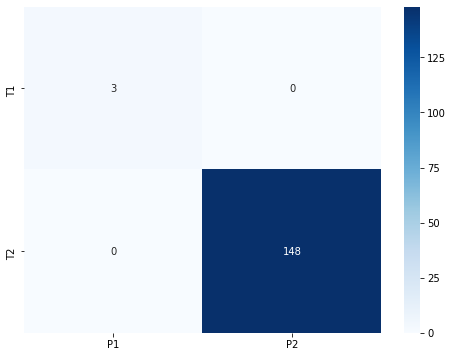

In [91]:
#Confusion matrix on test data
plt.figure(figsize =(8,6))
print('Confusion Matrix')
cf = metrics.confusion_matrix(predicted,test_y)
lb1 = ['P1','P2']
lb2 = ['T1','T2']
sns.heatmap(cf, annot =True, cmap = "Blues", fmt = "d", xticklabels = lb1,yticklabels = lb2 )
plt.show()

In [0]:
rfc = RandomForestClassifier()


In [0]:
def train_model(model):
    # Checking accuracy
    model = model.fit(train_x,train_y)
    pred = model.predict(test_x)
    print('accuracy_score',accuracy_score(test_y, pred))
    print('precision_score',precision_score(test_y, pred))
    print('recall_score',recall_score(test_y, pred))
    print('f1_score',f1_score(test_y, pred))
    return model

In [21]:
rfc = train_model(rfc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.9994733330992591
precision_score 0.9326923076923077
recall_score 0.7185185185185186
f1_score 0.8117154811715481


### f1 score is still less with Random forest model also.Now We will use under/over sampling techniques & check these parameters

# RandomUnderSampler


In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
x_rus, y_rus, id_rus = rus.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
train_x, test_x,train_y,test_y = train_test_split(x_rus, y_rus, test_size=0.3)

In [24]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(688, 30) (688,)
(296, 30) (296,)


### With RandomUnderSampler algorithm majority sample(i.e.'0',no-defaulter has drastically reduced.

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(train_x,train_y)
classes = dt.predict(test_x)
class_names = 'Default'
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.9121621621621622

In [27]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes ))
print("Precision\Recall metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
print(metrics.roc_auc_score(test_y,classes))

Accuracy Score
0.9121621621621622
Precision\Recall metrics
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.92      0.90      0.91       148

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

AUC
0.9121621621621622


### f1 score has increased with RandomUnderSampler algorithm.

#RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

accuracy_score 0.9425675675675675
precision_score 0.9924812030075187
recall_score 0.8918918918918919
f1_score 0.9395017793594306


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Over Sampling Using SMOTE Tomek

In [0]:
#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt, y_smt = smt.fit_sample(x, y)

In [29]:
train_x,test_x,train_y, test_y = train_test_split(x_smt, y_smt, test_size = 0.30, random_state =1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(397314, 30)

(397314,)

(170278, 30)

(170278,)

In [30]:
#Check the sample size for both the classes after SMOTE algorithm
classes = log.predict(test_x)
print(classes.size)
print('Positive cases ',test_y[test_y == 1].shape[0])
print('Negative cases ',test_y[test_y == 0].shape[0])

170278
Positive cases  85040
Negative cases  85238


### with Oversampling technique positive class sample size has increased.SMOTE has created synthetic sample of defaulter using KNN algorithm

# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(train_x,train_y)
classes = dt.predict(test_x)
class_names = 'Default'
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.971771684129769

In [36]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes ))
print("Precision\Recall metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
print(metrics.roc_auc_score(test_y,classes))

Accuracy Score
0.9717814397632107
Precision\Recall metrics
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85238
           1       0.98      0.96      0.97     85040

    accuracy                           0.97    170278
   macro avg       0.97      0.97      0.97    170278
weighted avg       0.97      0.97      0.97    170278

AUC
0.971771684129769


### Using SMOTE(oversampling technique) we got f1 score 0.97.quiet good.let's try one more sampling technique.

#Random Forest Classification

In [37]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.9997827082770528
precision_score 0.9996708167272129
recall_score 0.9998941674506114
f1_score 0.9997824796148126


# Random Sampling Using Cluster Centroids

In [0]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
x_cc, y_cc = cc.fit_sample(x, y)

# Train and Test The Data

In [39]:
train_x,test_x,train_y, test_y = train_test_split(x_cc, y_cc, test_size = 0.30, random_state =1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(351, 30)

(351,)

(151, 30)

(151,)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(train_x,train_y)
classes = dt.predict(test_x)
class_names = 'Default'
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.9932432432432432

In [41]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes ))
print("Precision\Recall metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
print(metrics.roc_auc_score(test_y,classes))

Accuracy Score
0.9867549668874173
Precision\Recall metrics
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.99      0.99       148

    accuracy                           0.99       151
   macro avg       0.80      0.99      0.87       151
weighted avg       0.99      0.99      0.99       151

AUC
0.9932432432432432


### With cluster centroid sampling technique we got f1 score 0.99 for '1'(defauter).too good!! 

# Random Forest Classifier

In [42]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Given the class imbalance ratio, Confusion matrix accuracy is not meaningful.For unbalanced classification we need to measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC).

In [0]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, classes)

In [63]:
# calculate F1 score
f1 = f1_score(test_y, classes)
f1

0.9931972789115647

In [0]:
# calculate precision-recall AUC
auc = auc(recall, precision)

Area Under Curve: 1.00


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall example: AUC=1.00')

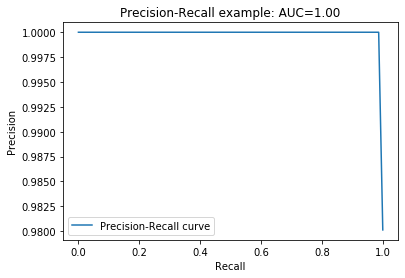

In [95]:
from sklearn.metrics import precision_recall_curve, auc
# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(test_y, classes)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)
import pylab as pl
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()